In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'AppleGothic'
#plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
df = pd.read_csv('제주특별자치도_해양환경 연안 측정 데이터_20221120.csv')
df = df.dropna()
df.rename(columns={'수질평가지수(WQI)등급': '수질등급'}, inplace=True)
dummies = pd.get_dummies(df['날씨'], prefix='날씨').astype(int)

df = df.drop('날씨', axis=1)

df = pd.concat([df, dummies], axis=1)

dummies = pd.get_dummies(df['수층'], prefix='수층').astype(int)

df = df.drop('수층', axis=1)

df = pd.concat([df, dummies], axis=1)

df['측정 일자'] = pd.to_datetime(df['측정 일자'])
df['년'] = df['측정 일자'].dt.year.astype(int)
df['월'] = df['측정 일자'].dt.month.apply(lambda x: f'{x:02d}').astype(int)
df['일'] = df['측정 일자'].dt.day.apply(lambda x: f'{x:02d}').astype(int)
#df = df.drop(['측정 일자'],axis = 1)

df = df.drop(['측정 연도',	'측정 월','위도',	'경도'],axis = 1)

In [16]:
pyoseon = df[df['정점명'].isin(['표선1', '표선2'])].drop(['정점명'], axis=1)

In [17]:
pyoseon

,측정 일자,수심,투명도,수질등급,수온,염분,수소이온농도,용존산소량,화학적산소요구량,암모니아성질소,...,클로로필에이,날씨_구름많음,날씨_구름조금,날씨_맑음,날씨_흐림,수층_저층,수층_표층,년,월,일
26,2021-11-18,38.0,10.0,2,20.00,34.01,8.16,8.18,1.56,8.18,...,1.89,0,0,1,0,0,1,2021,11,18
27,2021-11-18,33.0,10.0,1,20.29,34.01,8.16,8.43,1.40,5.57,...,1.06,0,0,1,0,0,1,2021,11,18
36,2021-11-18,38.0,10.0,2,19.86,33.99,8.13,8.57,1.26,8.82,...,1.34,0,0,1,0,1,0,2021,11,18
37,2021-11-18,33.0,10.0,1,19.59,33.98,8.14,8.91,0.46,7.08,...,1.86,0,0,1,0,1,0,2021,11,18
47,2021-08-31,38.0,8.0,2,23.79,31.33,8.38,9.08,2.03,7.30,...,4.42,0,0,1,0,0,1,2021,8,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,2011-05-17,28.0,7.5,1,15.01,34.12,8.37,8.44,0.57,16.30,...,0.00,0,0,1,0,1,0,2011,5,17
1621,2011-02-22,74.0,8.2,1,15.05,34.50,8.10,8.85,0.28,6.70,...,0.81,0,1,0,0,0,1,2011,2,22
1622,2011-02-22,23.0,8.5,1,14.83,34.53,8.10,8.76,1.05,19.30,...,0.81,0,1,0,0,0,1,2011,2,22
1632,2011-02-22,74.0,8.2,1,15.03,34.50,8.10,8.70,0.12,27.90,...,1.22,0,1,0,0,1,0,2011,2,22


In [18]:
pyoseon.columns

Index(['측정 일자', '수심', '투명도', '수질등급', '수온', '염분', '수소이온농도', '용존산소량', '화학적산소요구량',
       '암모니아성질소', '아질산성질소', '질산성질소', '용존무기질소', '총질소', '용존무기인', '총인', '규산규소',
       '부유물질', '클로로필에이', '날씨_구름많음', '날씨_구름조금', '날씨_맑음', '날씨_흐림', '수층_저층',
       '수층_표층', '년', '월', '일'],
      dtype='object')

In [19]:
year_avg = pyoseon.groupby('년')['수온'].mean()

year_avg

년
2011    18.552500
2012    17.915000
2013    19.048125
2014    18.195625
2015    18.956875
2016    19.115625
2017    19.373125
2018    18.218750
2019    20.068125
2020    19.378125
2021    19.027500
Name: 수온, dtype: float64

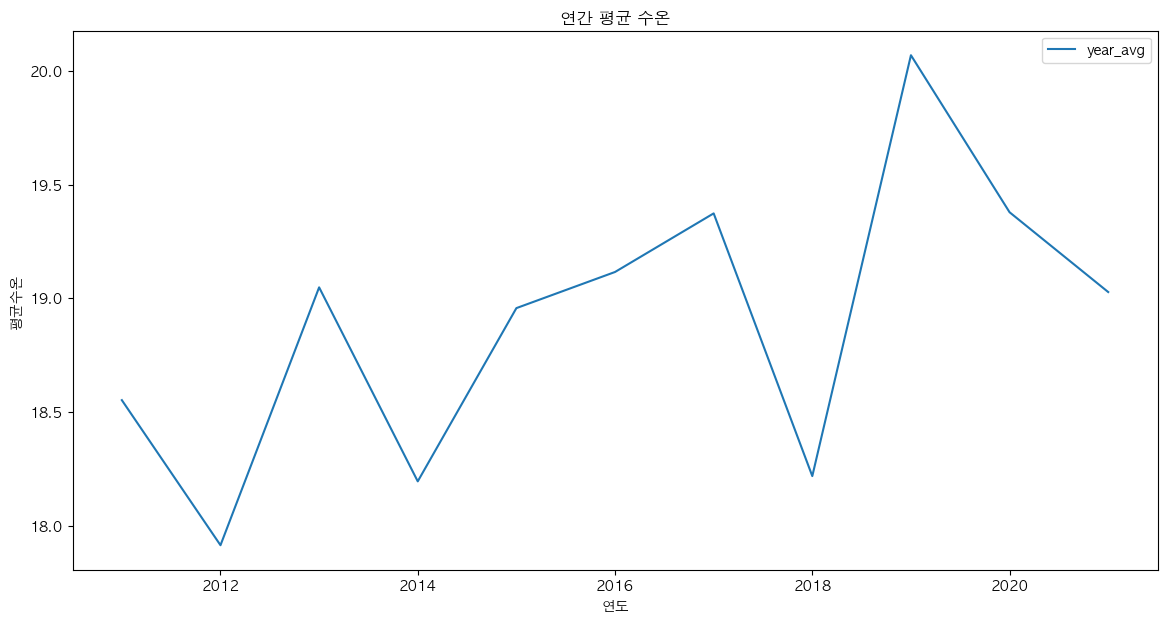

In [20]:
plt.figure(figsize=(14, 7))
plt.plot(year_avg, label='year_avg')
plt.title('연간 평균 수온')
plt.xlabel('연도')
plt.ylabel('평균수온')
plt.legend()
plt.show()

In [21]:
month_avg = pyoseon.groupby(['년', '월'])['수온'].mean()

month_avg

년     월 
2011  2     14.8475
      5     15.0450
      8     22.6075
      11    21.7100
2012  2     14.7575
      5     17.6025
      8     21.3850
2013  2     14.6525
      5     16.7600
      8     23.5425
      11    21.2375
2014  2     14.7575
      5     17.5750
      8     20.7025
      11    19.7475
2015  2     15.2100
      5     17.0400
      8     23.4200
      11    20.1575
2016  2     14.6550
      5     16.0925
      8     24.1400
      11    21.5750
2017  2     15.6725
      5     16.2075
      8     23.6550
      11    21.9575
2018  2     14.3750
      5     16.8325
      8     21.5100
      11    20.1575
2019  2     15.7525
      5     17.0475
      8     25.3775
      11    22.0950
2020  2     16.2300
      5     16.5325
      8     23.9300
      11    20.8200
2021  2     15.6125
      5     17.7975
      8     22.7650
      11    19.9350
Name: 수온, dtype: float64

/Users/juwonkim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/juwonkim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


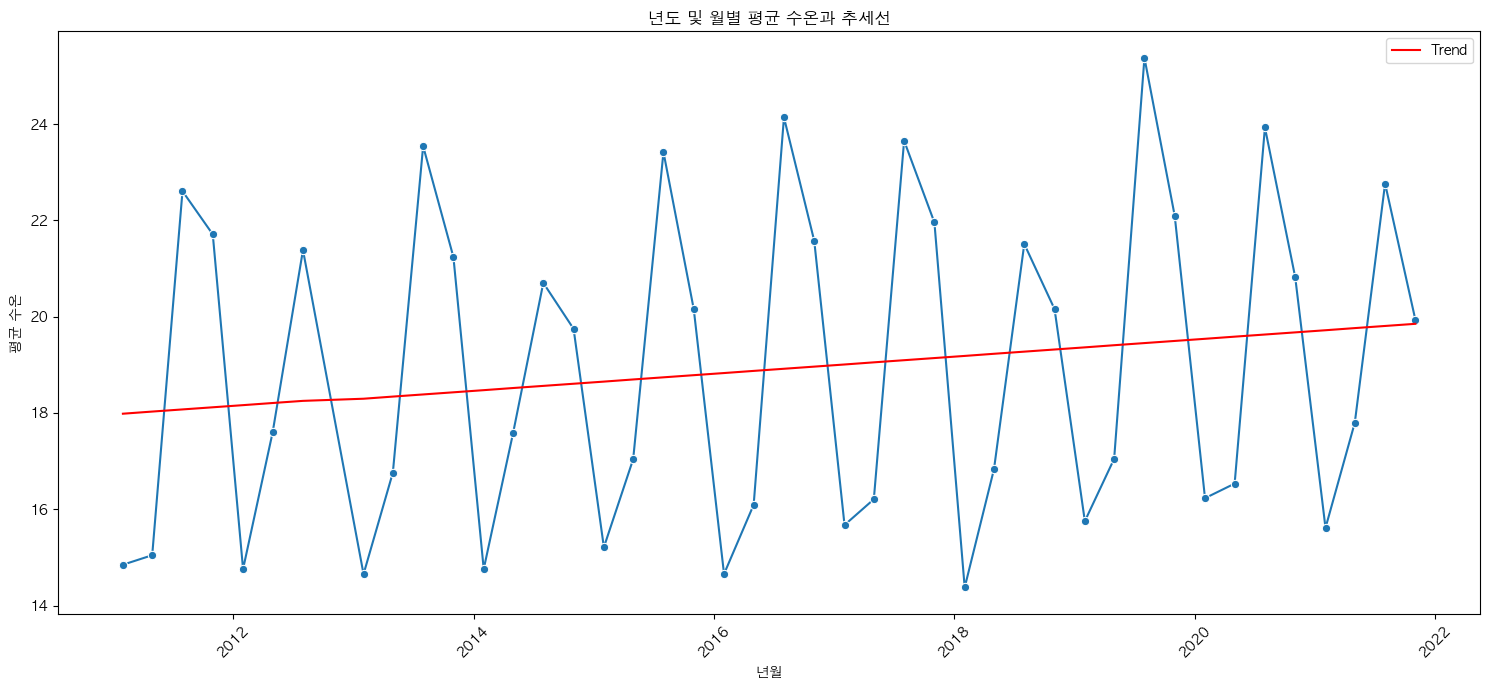

In [22]:
from sklearn.linear_model import LinearRegression

monthly_avg_temp_df = month_avg.reset_index()
monthly_avg_temp_df['년월'] = monthly_avg_temp_df['년'].astype(str) + '-' + monthly_avg_temp_df['월'].astype(str)
monthly_avg_temp_df['년월'] = pd.to_datetime(monthly_avg_temp_df['년월'])

# 선 그래프 그리기
plt.figure(figsize=(15, 7))
sns.lineplot(x='년월', y='수온', data=monthly_avg_temp_df, marker='o')

# 추세선 추가하기
# 날짜 데이터를 숫자로 변환 (LinearRegression을 위해)
X = np.array(monthly_avg_temp_df.index).reshape(-1, 1)
y = monthly_avg_temp_df['수온']

# 선형 회귀 모델 생성 및 학습
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# 추세선 계산
trend = lin_reg.predict(X)

# 추세선 그리기
plt.plot(monthly_avg_temp_df['년월'], trend, label='Trend', color='red')

# 그래프 설정
plt.title('년도 및 월별 평균 수온과 추세선')
plt.xlabel('년월')
plt.ylabel('평균 수온')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [23]:
train_df = pyoseon[pyoseon['년'] < 2021].drop('측정 일자', axis = 1)

test_df = pyoseon[pyoseon['년'] == 2021].drop('측정 일자', axis = 1)

X_train = train_df.drop('수온', axis=1)
y_train = train_df['수온']

X_test = test_df.drop('수온', axis=1)
y_test = test_df['수온']



In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
print("MAE : ", mae)


MAE :  1.490987499999998


In [25]:
predictions

array([21.589 , 21.7964, 20.5457, 20.8575, 28.0904, 28.0655, 19.1757,
       18.607 , 17.0707, 15.4641, 16.8172, 16.7819, 15.5536, 15.3943,
       15.4313, 15.4529])

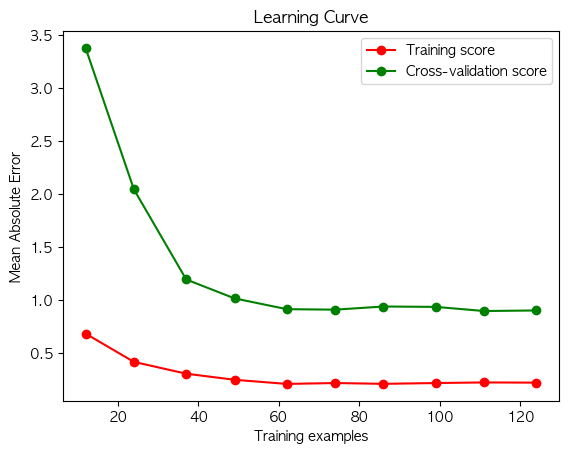

In [26]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    RandomForestRegressor(random_state=42), 
    X_train, 
    y_train, 
    n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 10), 
    scoring='neg_mean_absolute_error'
)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Mean Absolute Error")
plt.legend(loc="best")
plt.show()


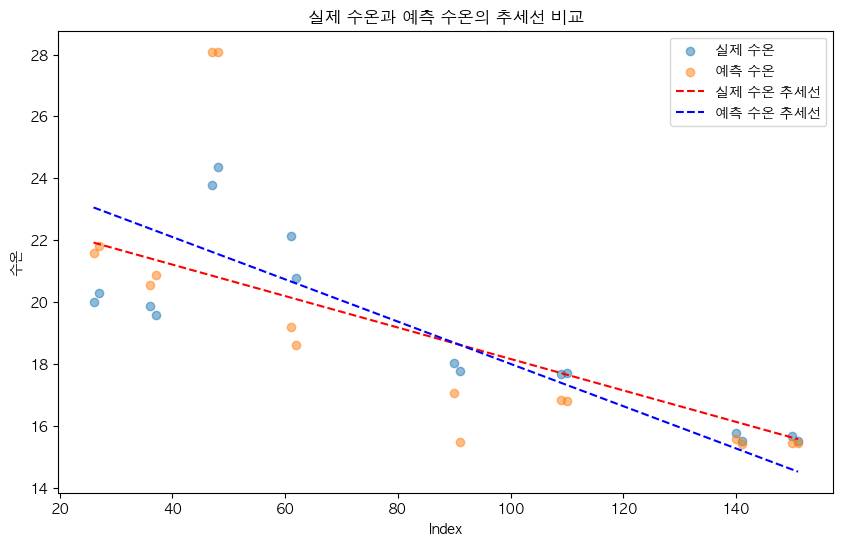

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# 실제 값에 대한 추세선 계산
z = np.polyfit(y_test.index, y_test, 1)
p = np.poly1d(z)

# 예측 값에 대한 추세선 계산
z_pred = np.polyfit(y_test.index, predictions, 1)
p_pred = np.poly1d(z_pred)

# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test, label='실제 수온', alpha=0.5)
plt.scatter(y_test.index, predictions, label='예측 수온', alpha=0.5)

# 추세선 그리기
plt.plot(y_test.index, p(y_test.index), "r--", label='실제 수온 추세선')
plt.plot(y_test.index, p_pred(y_test.index), "b--", label='예측 수온 추세선')

plt.title('실제 수온과 예측 수온의 추세선 비교')
plt.xlabel('Index')
plt.ylabel('수온')
plt.legend()
plt.show()


In [28]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

knn_model = KNeighborsRegressor(n_neighbors=5)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

# 성능 평가
mae = mean_absolute_error(y_test, y_pred)
print("MAE : ", mae)

MAE :  1.93675


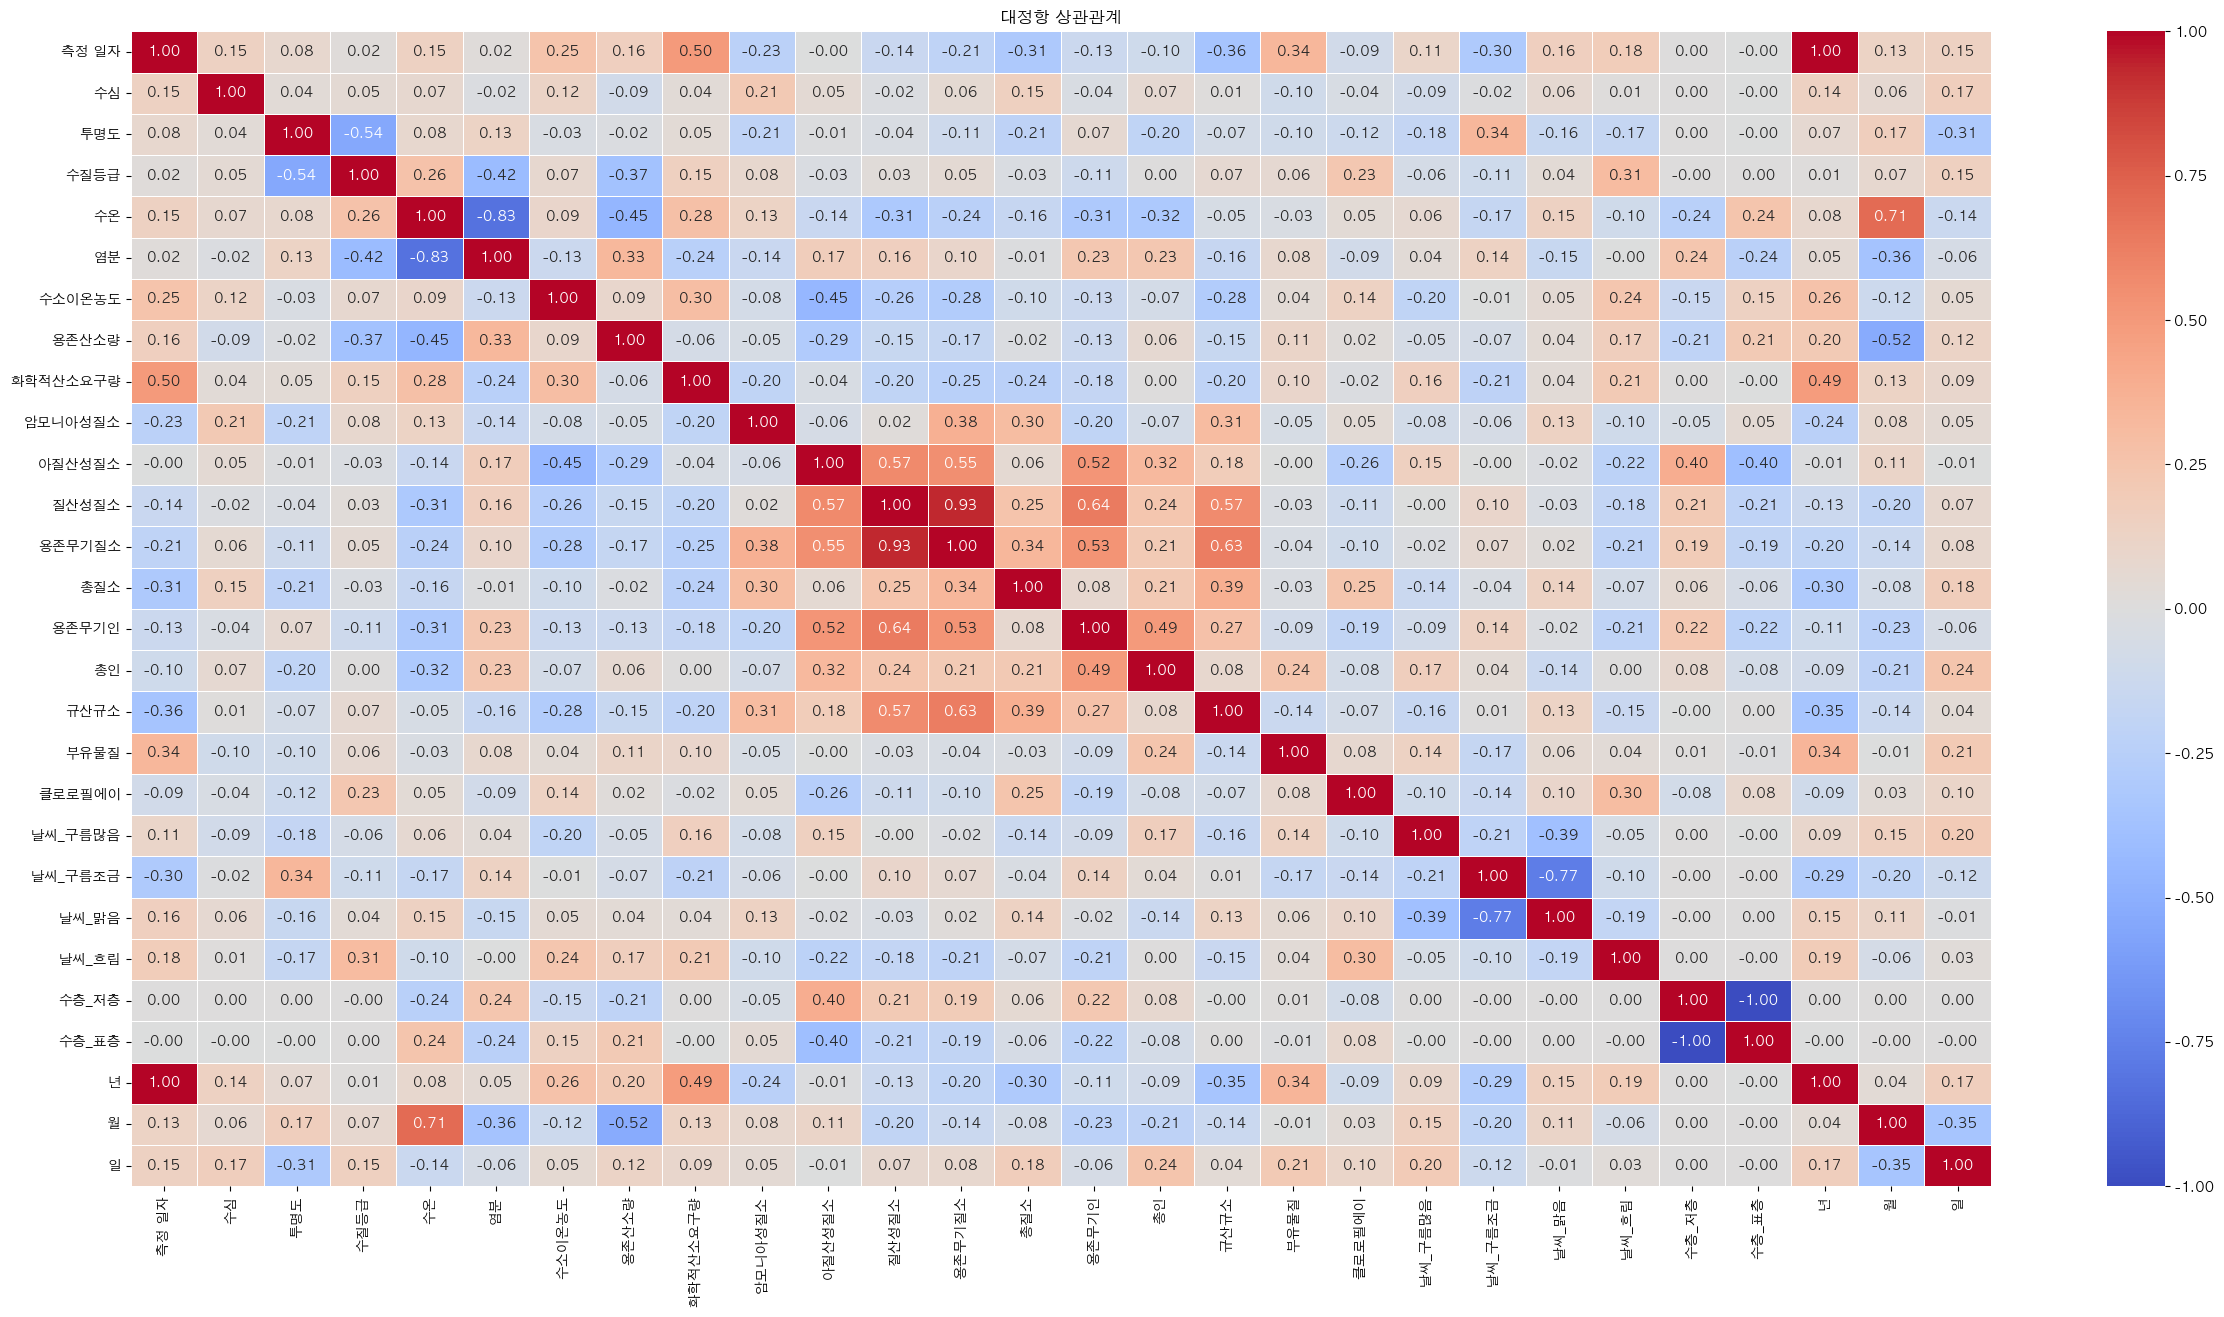

In [29]:
pyoseoncorr = pyoseon.corr()


plt.figure(figsize=(30, 15))
sns.heatmap(pyoseoncorr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('대정항 상관관계')
plt.show()

In [30]:
temp = pyoseon.drop(['측정 일자', '수심', '투명도', '수질등급', '염분', '수소이온농도', '용존산소량',
       '화학적산소요구량', '암모니아성질소', '아질산성질소', '질산성질소', '용존무기질소', '총질소', '용존무기인',
       '총인', '규산규소', '부유물질', '클로로필에이', 
       '수층_저층', '수층_표층', '년', '일'],axis=1)

In [31]:
temp

,수온,날씨_구름많음,날씨_구름조금,날씨_맑음,날씨_흐림,월
26,20.00,0,0,1,0,11
27,20.29,0,0,1,0,11
36,19.86,0,0,1,0,11
37,19.59,0,0,1,0,11
47,23.79,0,0,1,0,8
...,...,...,...,...,...,...
1585,15.01,0,0,1,0,5
1621,15.05,0,1,0,0,2
1622,14.83,0,1,0,0,2
1632,15.03,0,1,0,0,2


In [32]:
tempcorrs=temp.corr()


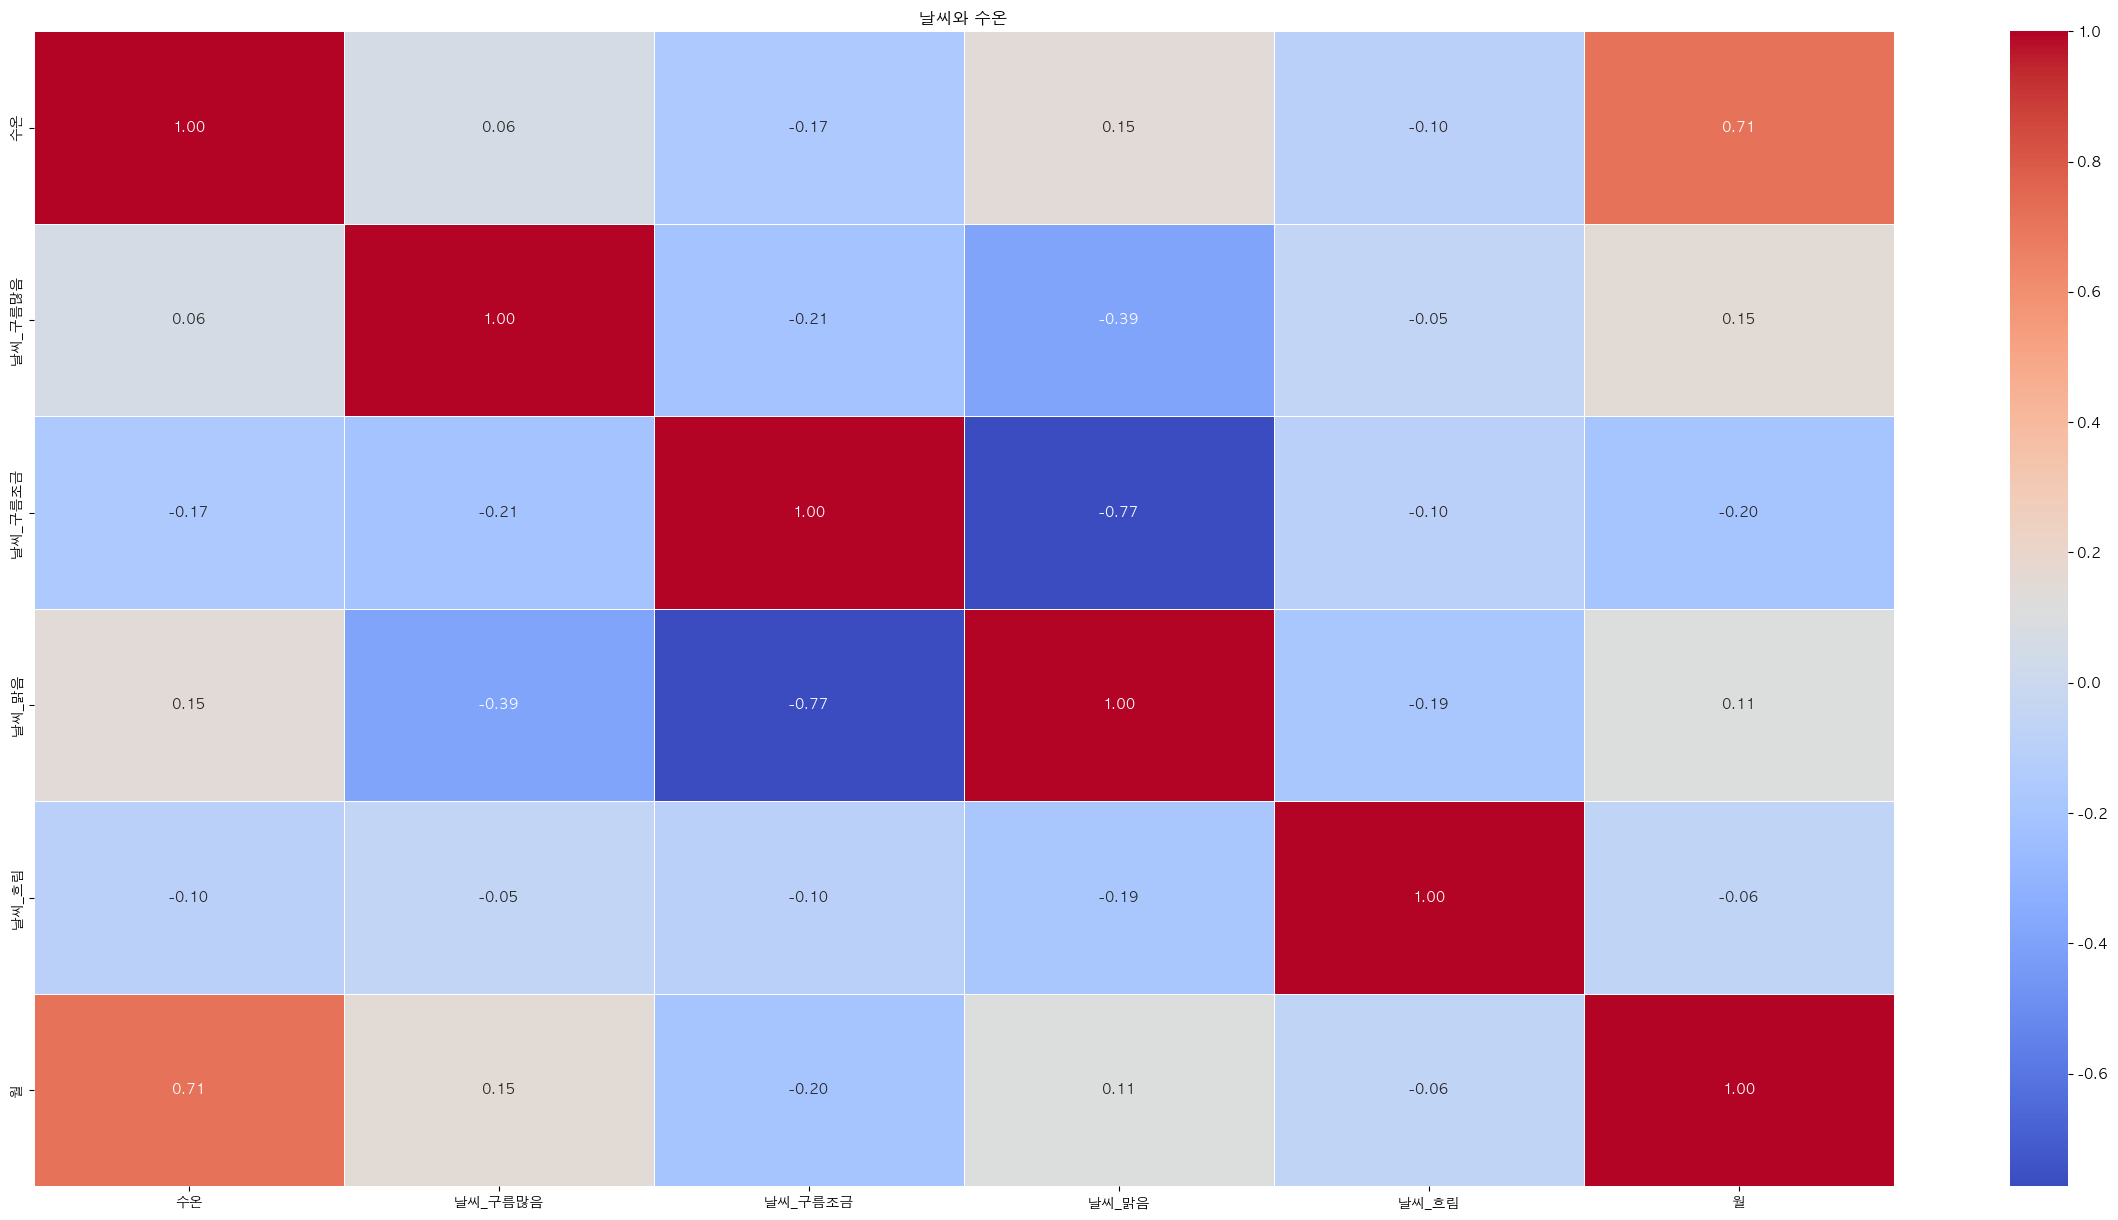

In [33]:
plt.figure(figsize=(30, 15))
sns.heatmap(tempcorrs, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('날씨와 수온')
plt.show()

In [34]:
che = pyoseon.drop(['측정 일자', '수심', '투명도', '수질등급', '수온', '염분',  '날씨_구름많음', '날씨_구름조금', '날씨_맑음', '날씨_흐림', '수층_저층',
       '수층_표층', '년', '월', '일'],axis = 1)

In [35]:
checorrs = che.corr()

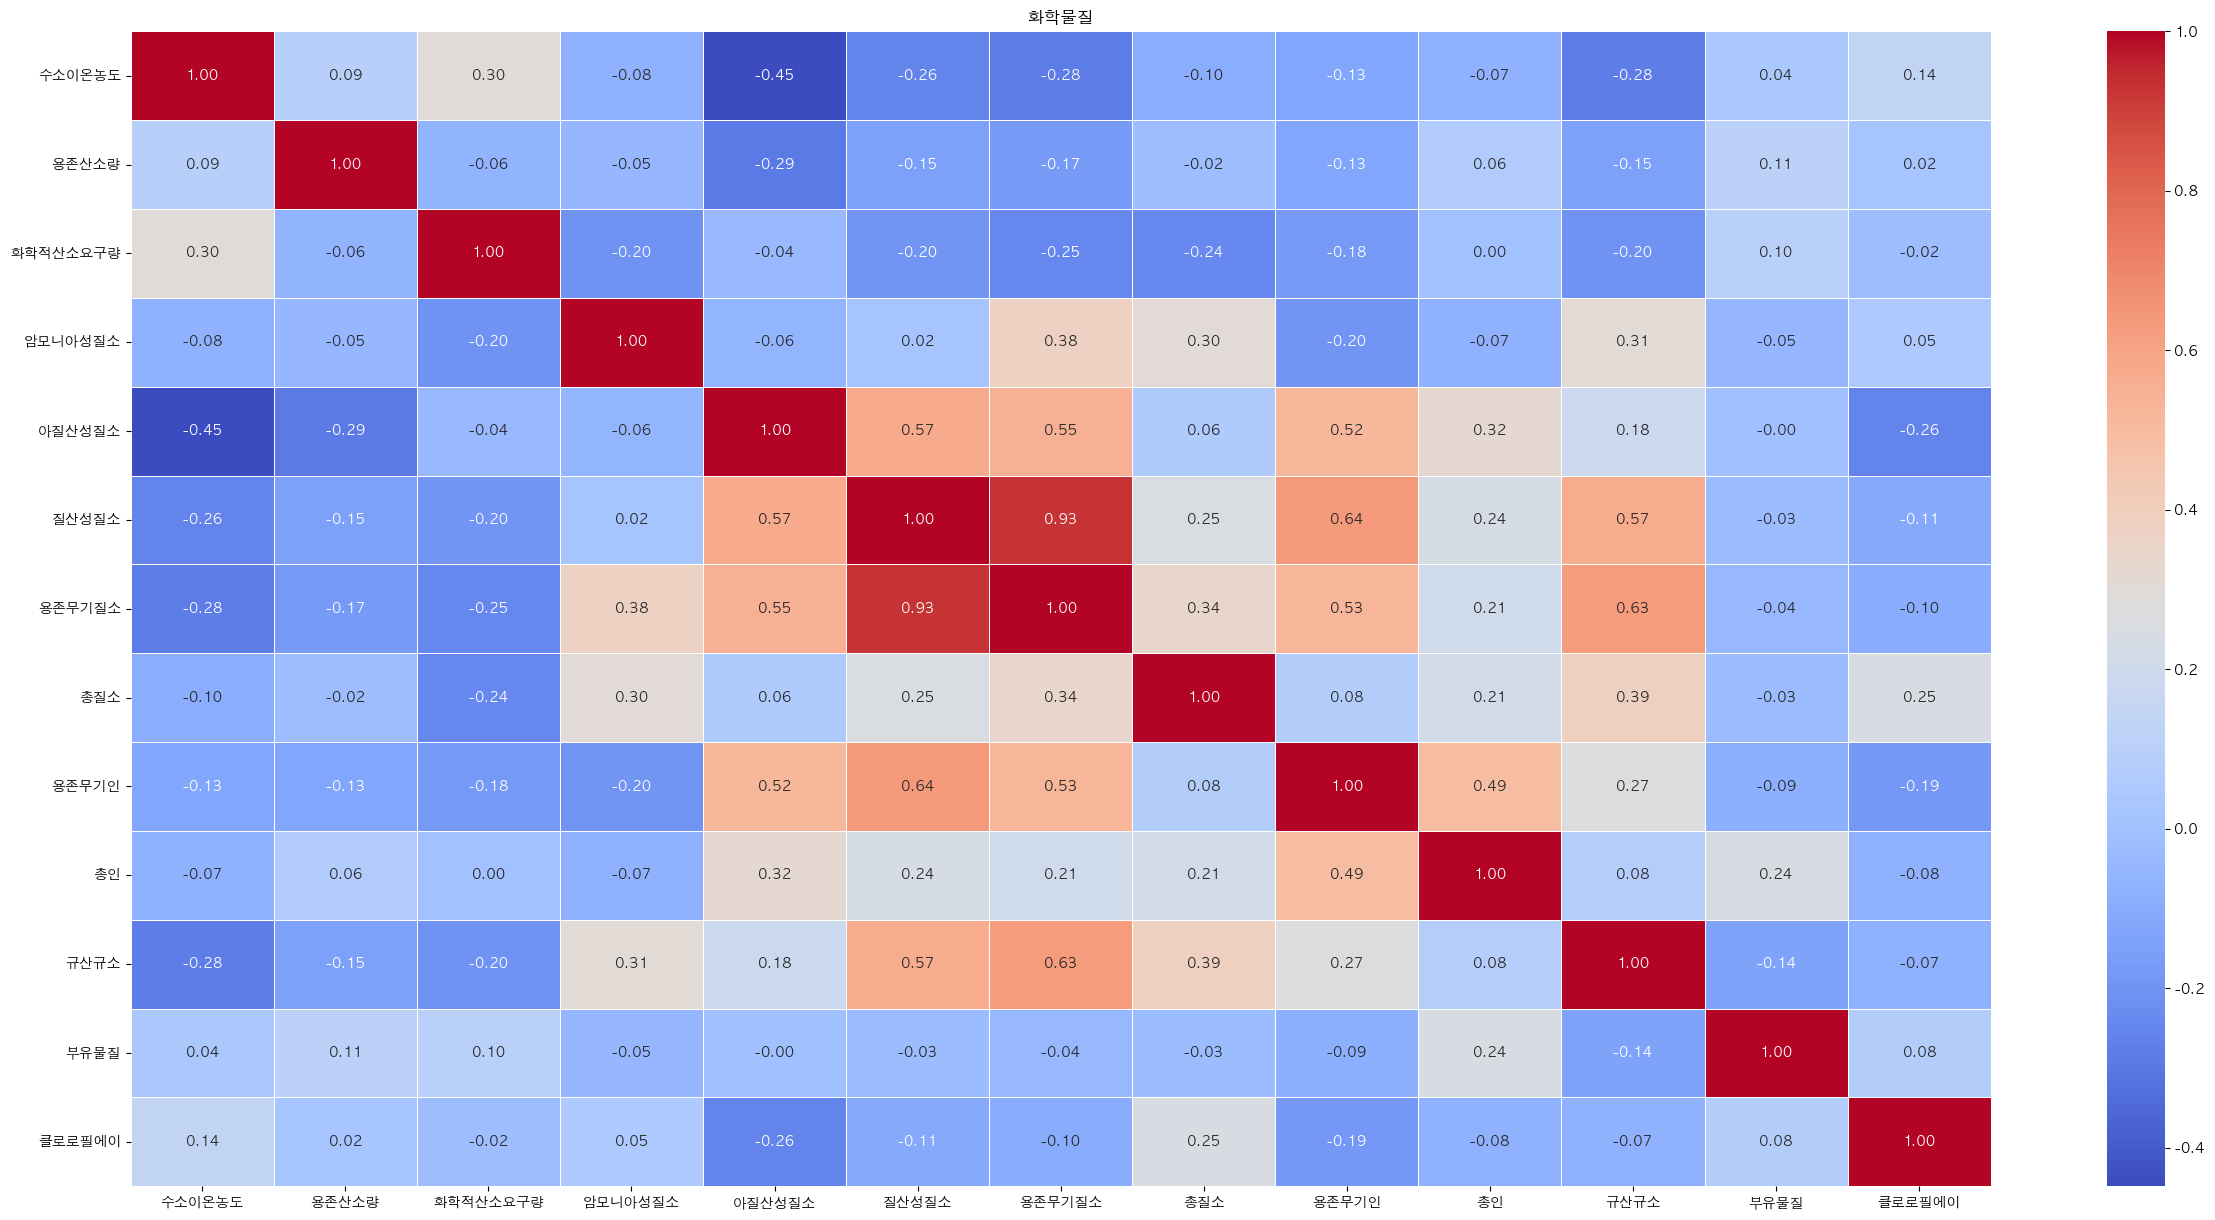

In [36]:
plt.figure(figsize=(30, 15))
sns.heatmap(checorrs, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('화학물질')
plt.show()

In [37]:
che2 = pyoseon.drop(['측정 일자', '수심', '투명도', '수질등급', '염분',  '날씨_구름많음', '날씨_구름조금', '날씨_맑음', '날씨_흐림', '수층_저층',
       '수층_표층', '년', '월', '일'],axis = 1)

In [38]:
che2corrs = che2.corr()

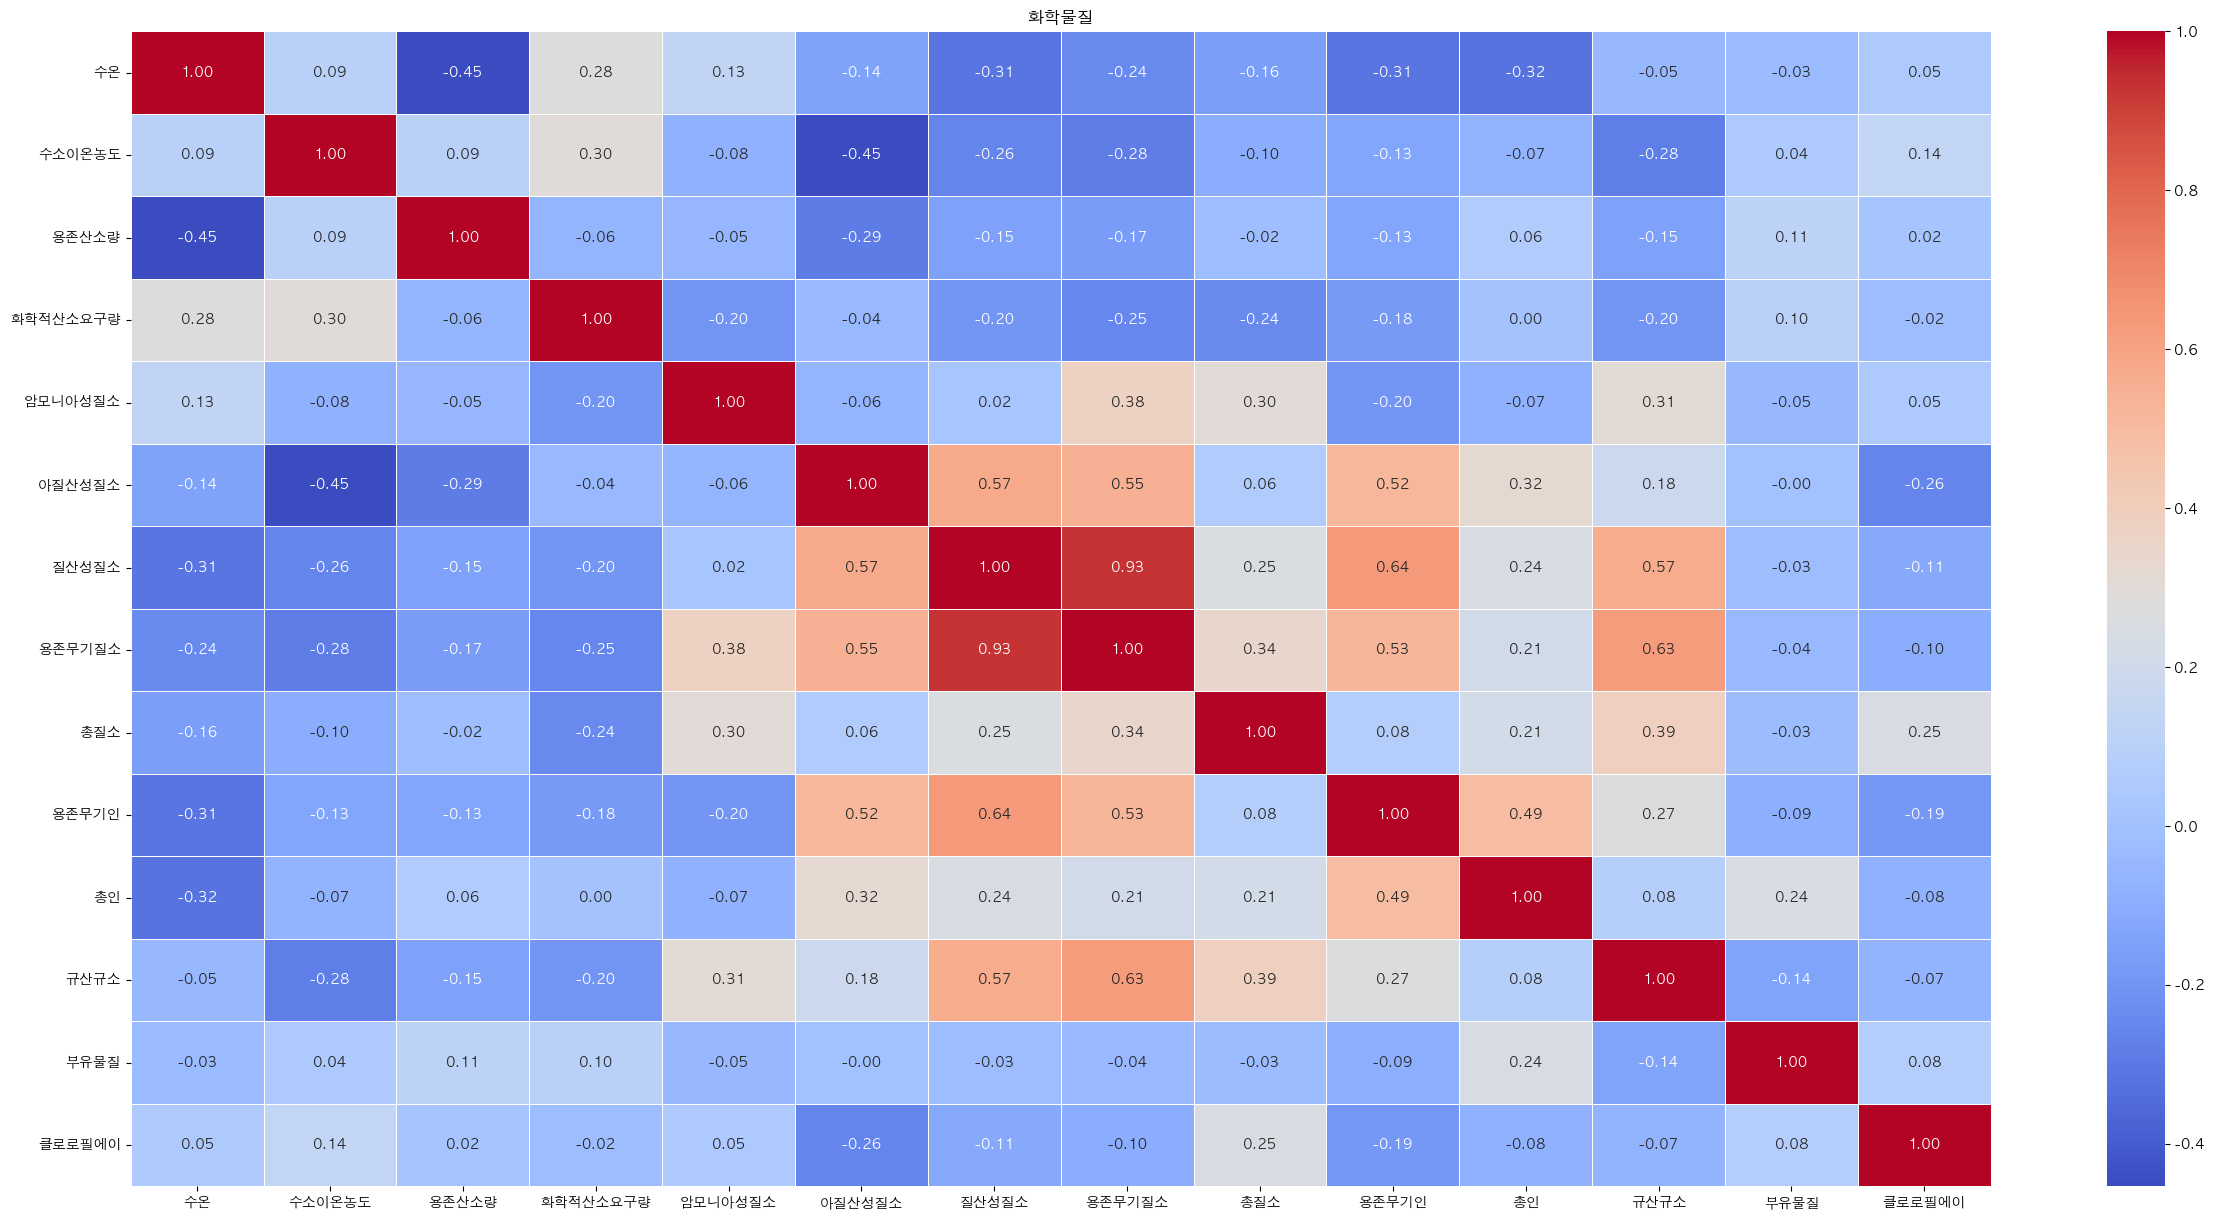

In [39]:
plt.figure(figsize=(30, 15))
sns.heatmap(che2corrs, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('화학물질')
plt.show()

/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_90001/3582716870.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_90001/3582716870.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_90001/3582716870.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_90001/3582716870.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_90001/3582716870.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_90001/3582716870.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_90001

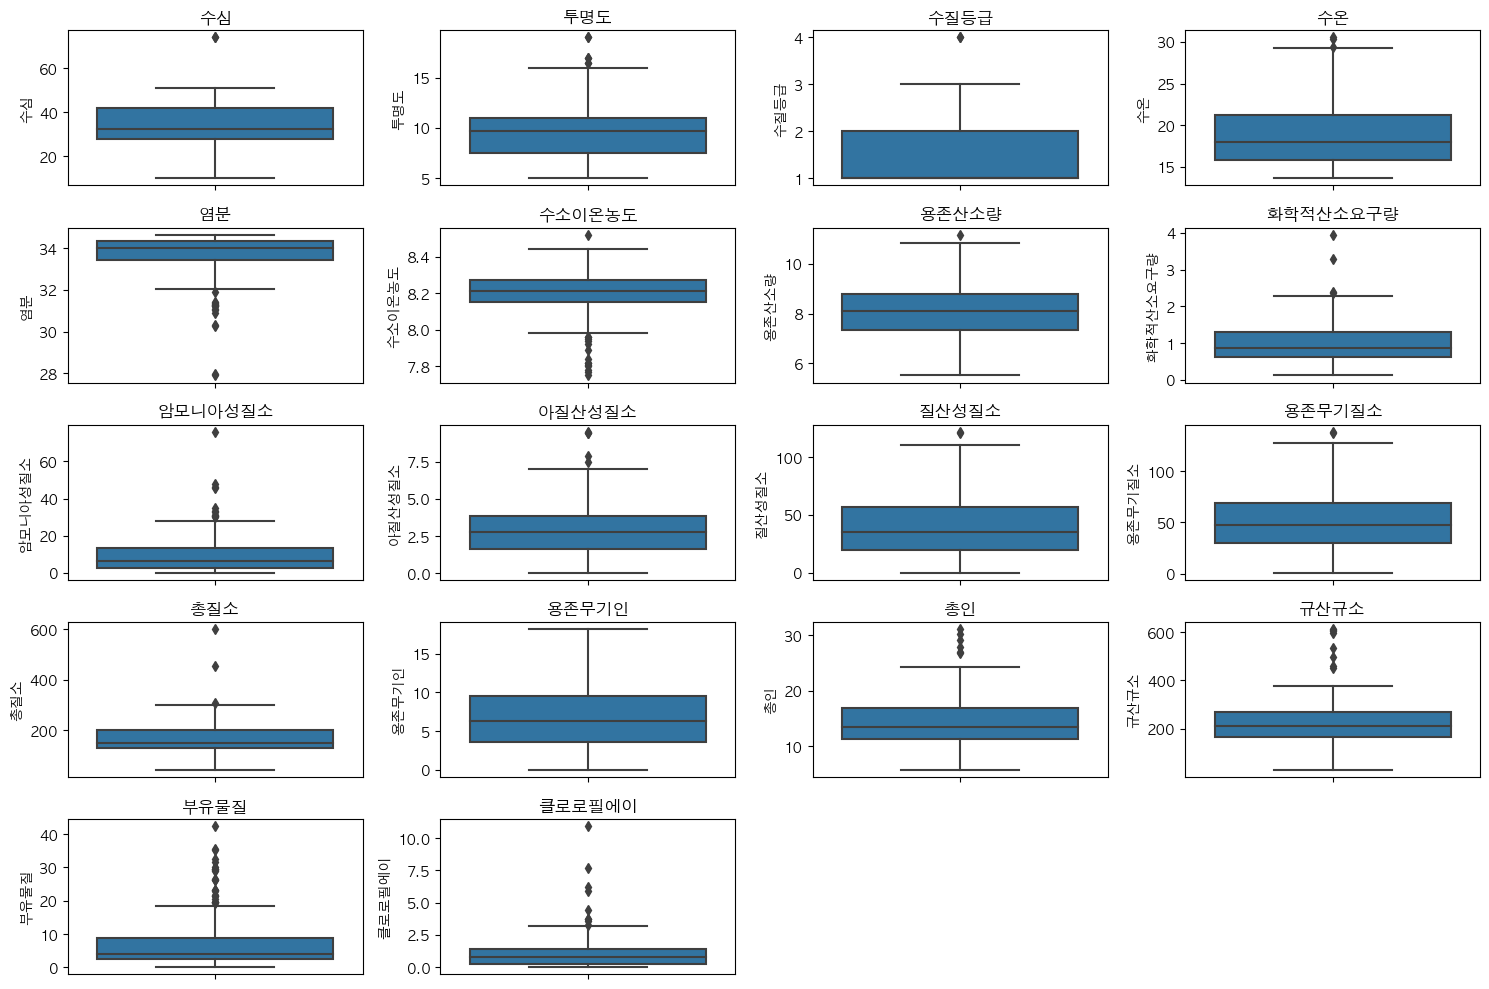

In [40]:
columns = ['수심', '투명도', '수질등급', '수온', '염분', '수소이온농도', '용존산소량', '화학적산소요구량',
       '암모니아성질소', '아질산성질소', '질산성질소', '용존무기질소', '총질소', '용존무기인', '총인', '규산규소',
       '부유물질', '클로로필에이'
]

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(5, 4, i)  
    sns.boxplot(y=pyoseon[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_90001/3314162283.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_90001/3314162283.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_90001/3314162283.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_90001/3314162283.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_90001/3314162283.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_90001/3314162283.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_90001/33141

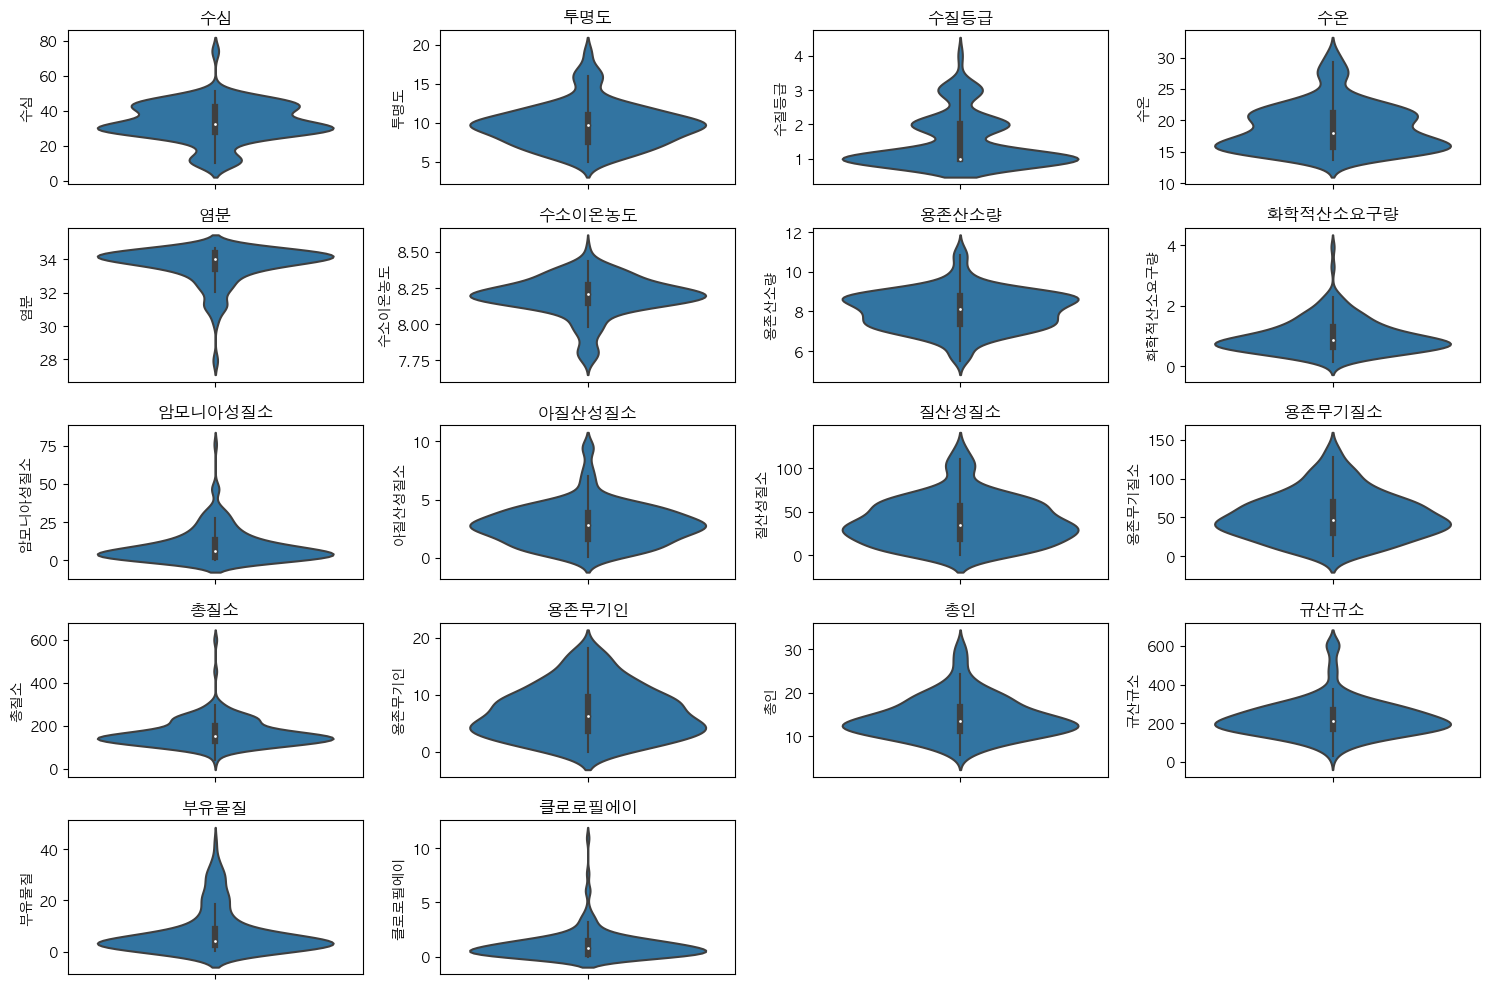

In [41]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(5, 4, i)  
    sns.violinplot(y=pyoseon[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_90001/1906801301.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_90001/1906801301.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_90001/1906801301.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_90001/1906801301.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_90001/1906801301.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_90001/1906801301.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_90001/19068

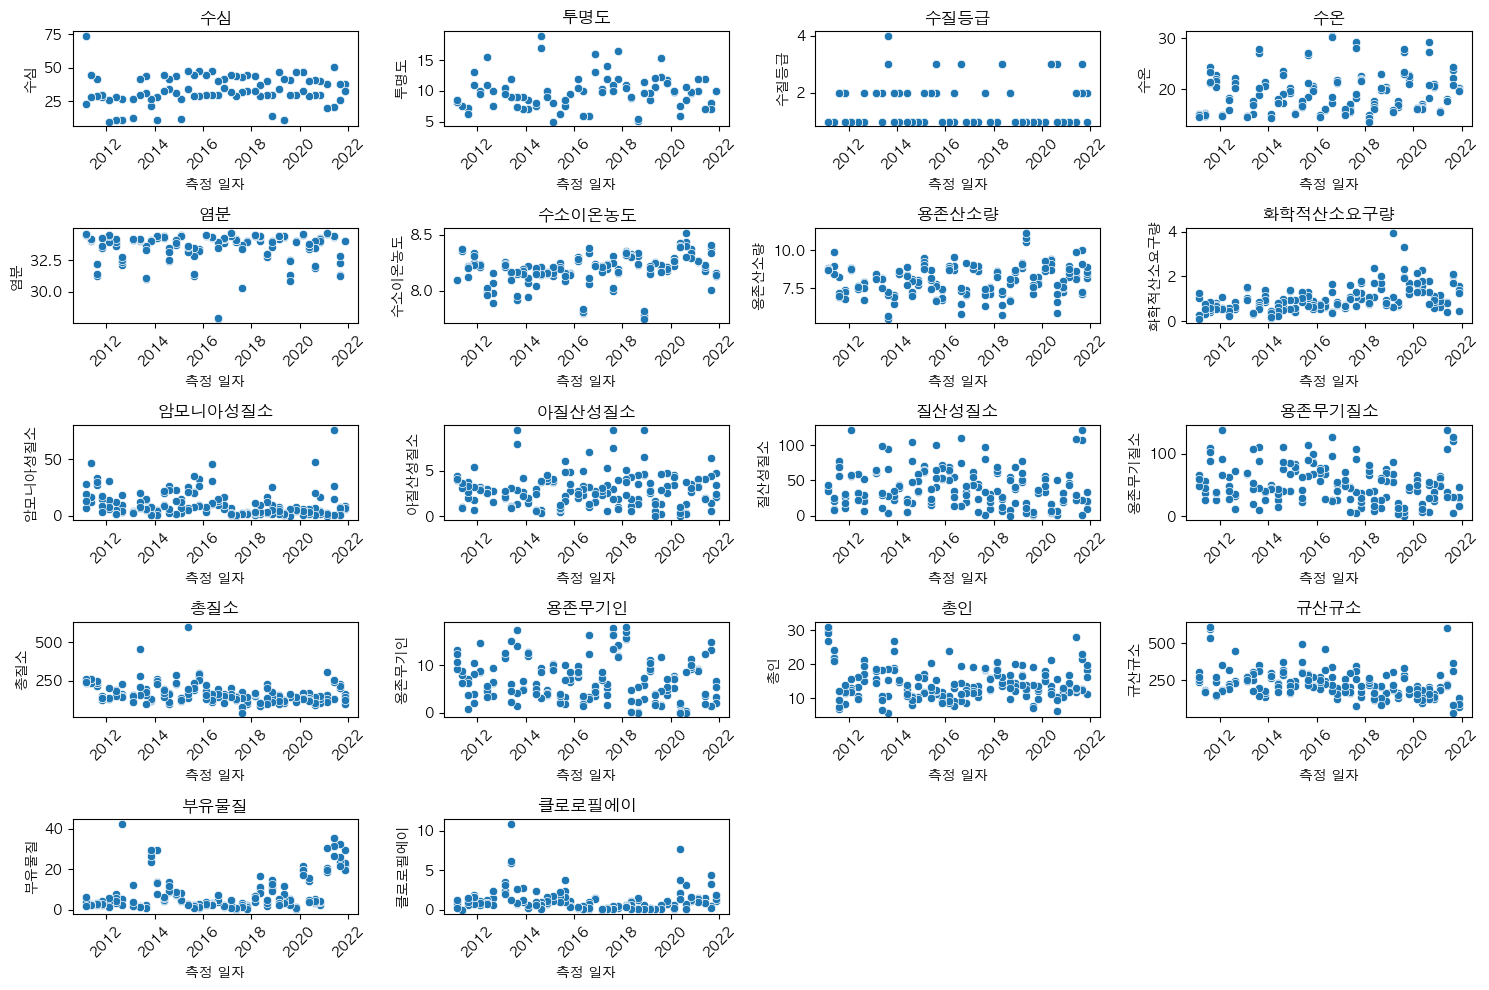

In [42]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(5, 4, i)  
    sns.scatterplot(data=pyoseon, x='측정 일자', y=column)
    plt.title(column)
    plt.xticks(rotation=45) 
    plt.tight_layout()

plt.show()

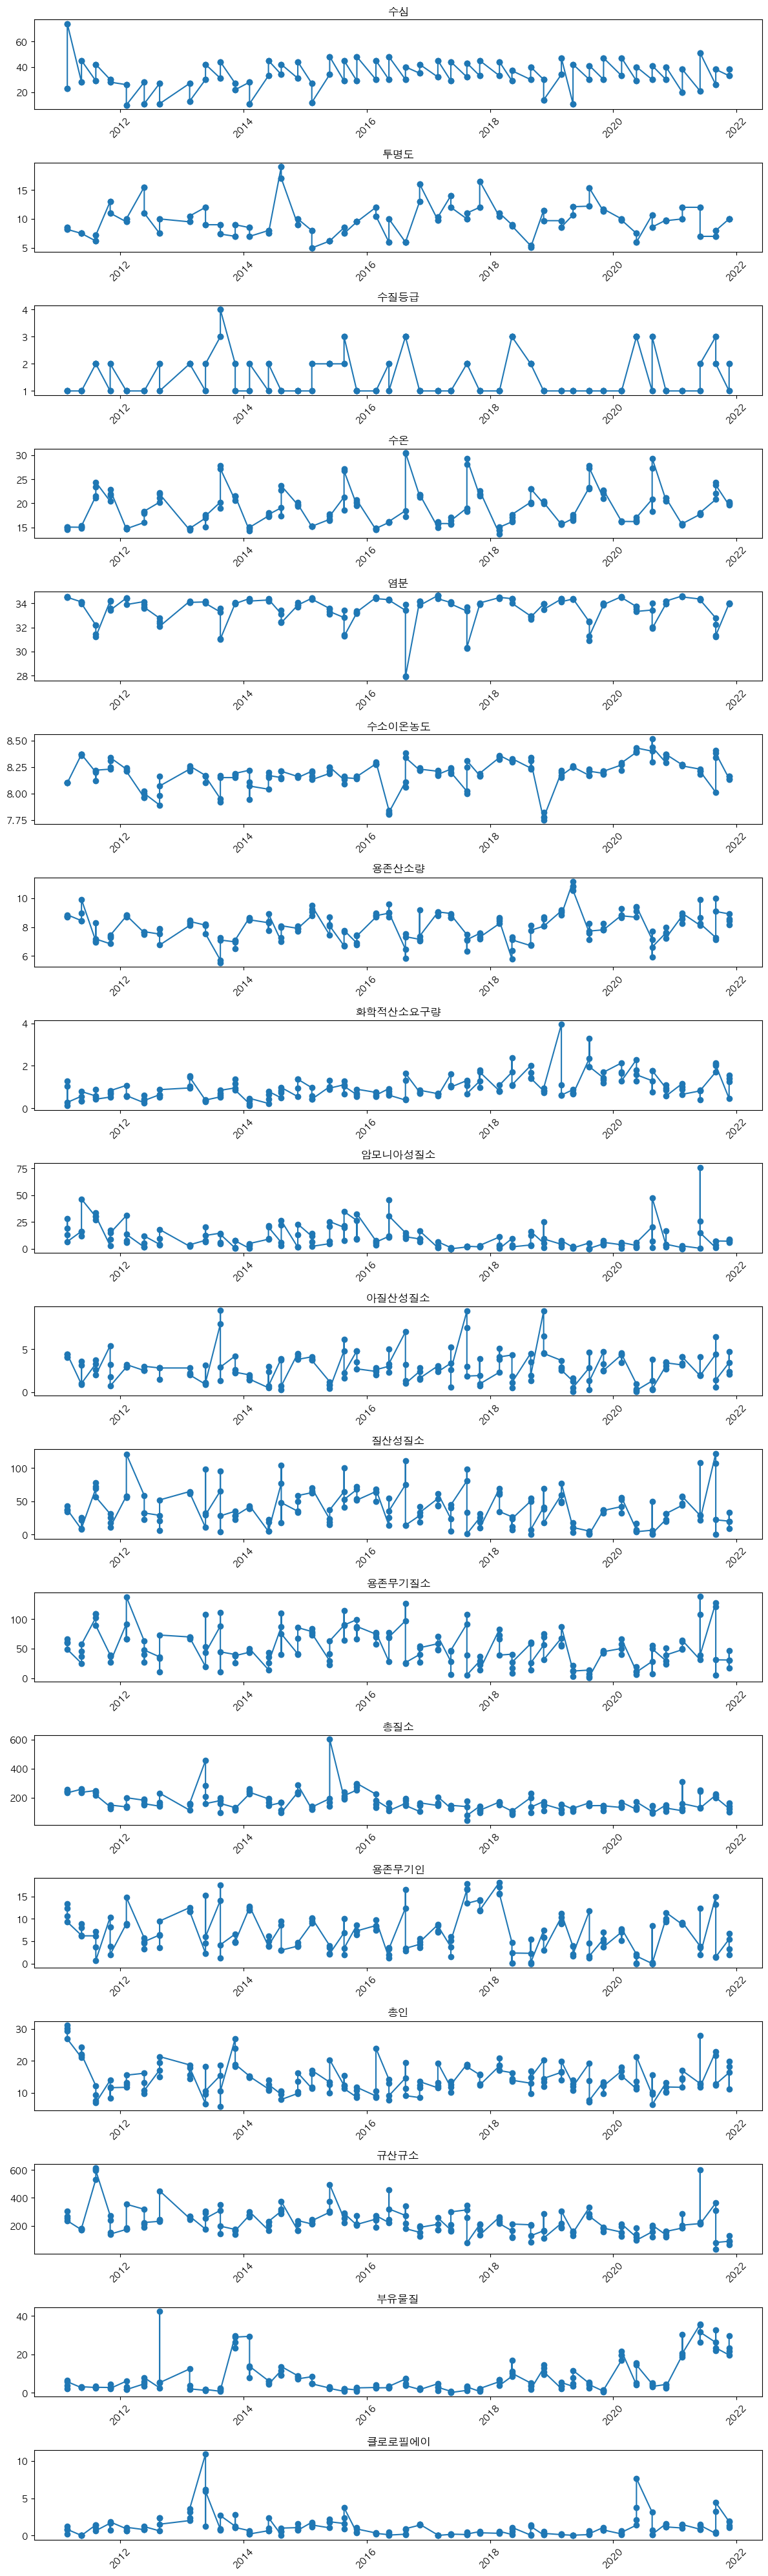

In [43]:
fig, axes = plt.subplots(len(columns), 1, figsize=(12, 40))

for i, column in enumerate(columns):
    axes[i].plot(pyoseon['측정 일자'], pyoseon[column], label=column, marker='o')
    axes[i].set_title(column)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


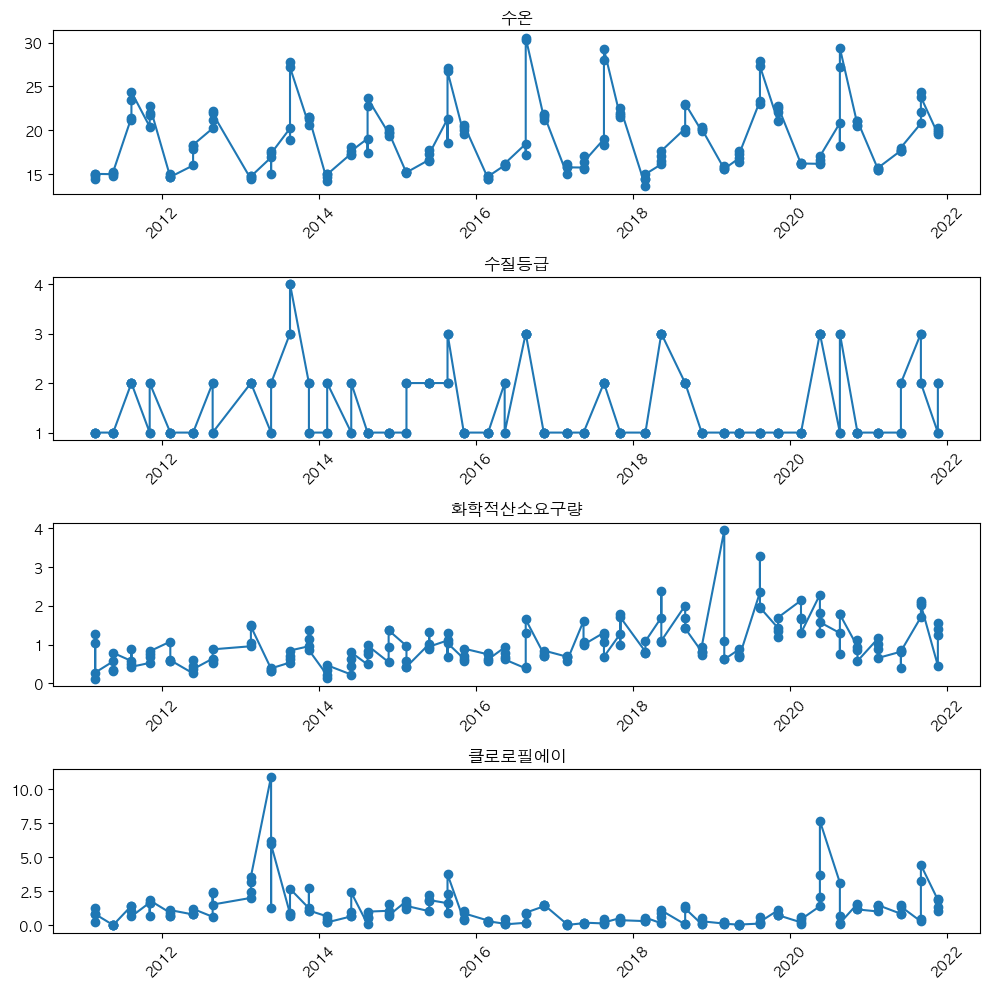

In [46]:
new_col = ['수온','수질등급', '화학적산소요구량','클로로필에이']
fig, axes = plt.subplots(len(new_col), 1, figsize=(10, 10))

for i, column in enumerate(new_col):
    axes[i].plot(pyoseon['측정 일자'], pyoseon[column], label=column, marker='o')
    axes[i].set_title(column)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_features_for_standardization = pyoseon.drop(['측정 일자','년','월','일'], axis=1).select_dtypes(include=['float64', 'int64'])

standardized_features = scaler.fit_transform(numerical_features_for_standardization)

standardized_features_df = pd.DataFrame(standardized_features, columns=numerical_features_for_standardization.columns)

pyoseon = pd.concat([pyoseon['측정 일자'], standardized_features_df], axis=1)

pyoseon.head()


,측정 일자,수심,투명도,수질등급,수온,염분,수소이온농도,용존산소량,화학적산소요구량,암모니아성질소,...,총인,규산규소,부유물질,클로로필에이,날씨_구름많음,날씨_구름조금,날씨_맑음,날씨_흐림,수층_저층,수층_표층
26,2021-11-18,0.590687,-1.372776,1.988019,-0.699651,0.114216,1.538095,1.033310,0.542401,-0.723280,...,-0.493635,-0.436425,0.899983,0.749956,-0.320256,-0.640184,-1.207122,6.480741,1.0,-1.0
27,2021-11-18,-0.416142,-0.822983,1.988019,-0.726272,0.096525,1.464832,0.616320,2.298965,-0.607811,...,-0.658127,-1.130903,-0.423277,0.226884,-0.320256,-0.640184,-1.207122,6.480741,1.0,-1.0
36,2021-11-18,0.682217,2.035936,-0.704416,2.233978,-2.052851,0.146100,-0.360047,1.713444,-0.857077,...,-1.415212,0.414844,-0.411720,-0.620345,-0.320256,-0.640184,0.828417,-0.154303,-1.0,1.0
37,2021-11-18,-0.324612,0.899699,-0.704416,2.375069,-2.415503,0.292626,0.189159,1.695701,-0.882737,...,-1.520656,0.578100,-0.608186,-0.671915,-0.320256,-0.640184,0.828417,-0.154303,-1.0,1.0
47,2021-08-31,0.041508,-0.016622,-0.704416,-0.880674,0.653771,0.072837,1.063821,5.244314,-0.508837,...,0.427942,-0.109811,-0.642857,-0.716119,3.122499,-0.640184,-1.207122,-0.154303,1.0,-1.0


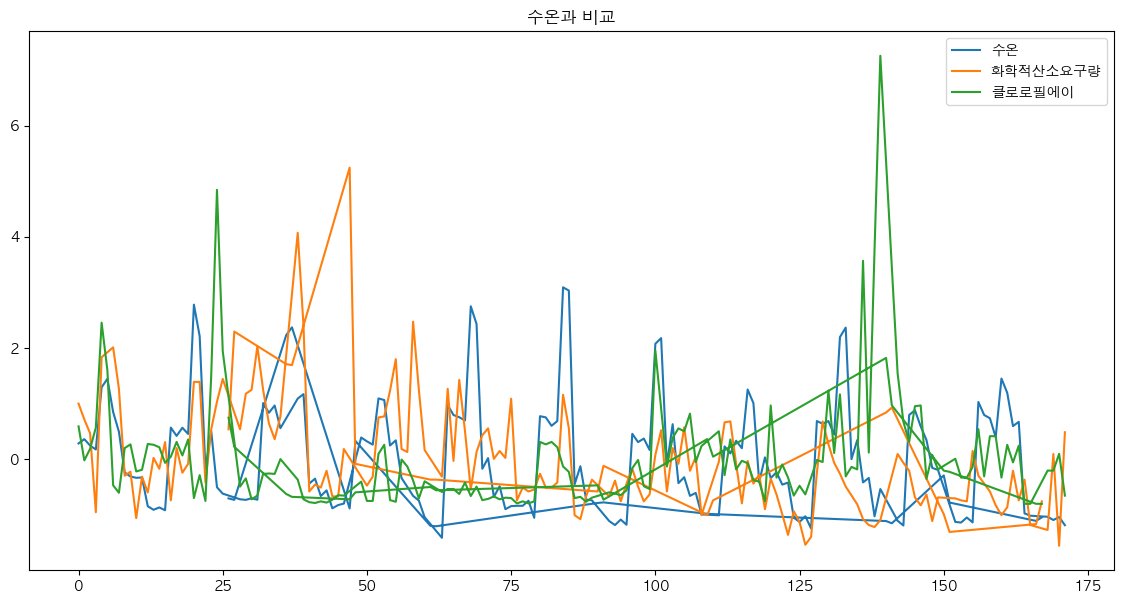

In [53]:
plt.figure(figsize=(14, 7))
plt.plot(pyoseon['수온'], label='수온')
#plt.plot(jeju['날씨_맑음'], label='날씨_맑음')
plt.plot(pyoseon['화학적산소요구량'], label='화학적산소요구량')
plt.plot(pyoseon['클로로필에이'], label='클로로필에이')

plt.title('수온과 비교')

plt.legend()
plt.show()

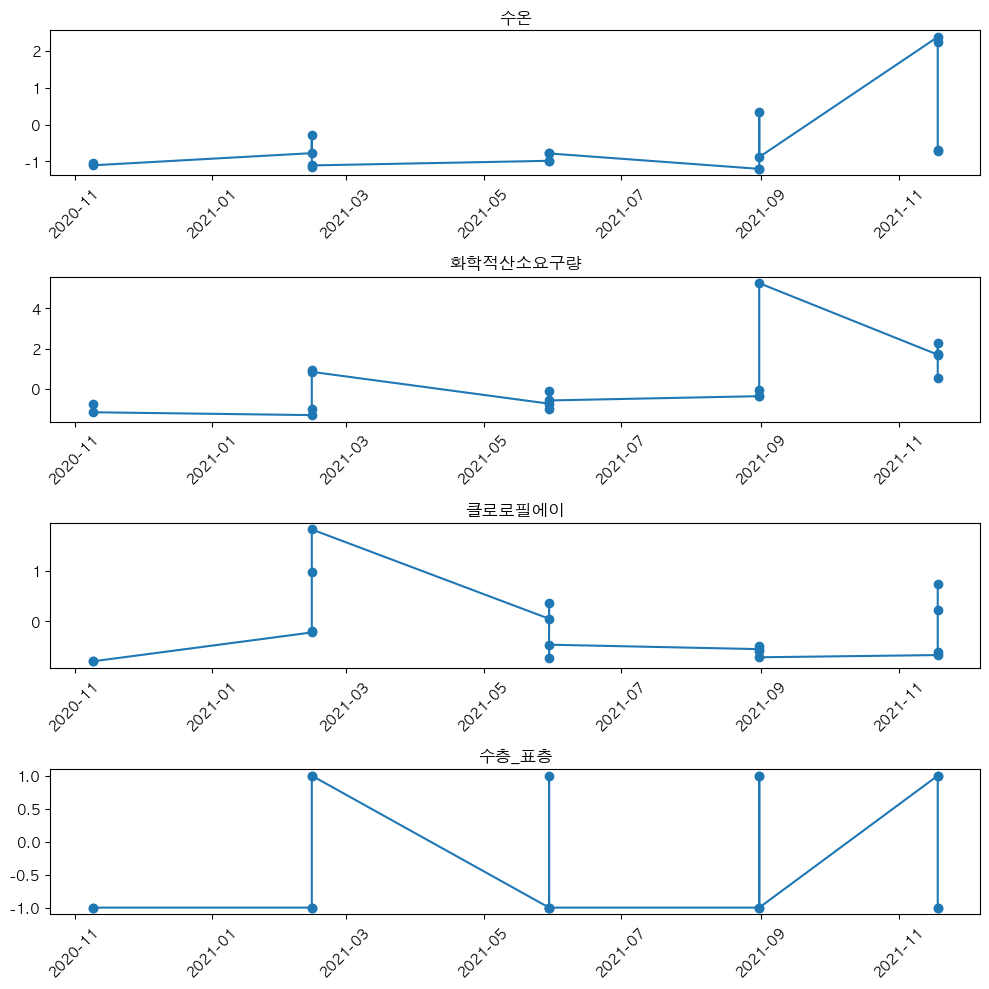

In [54]:
new_col = ['수온', '화학적산소요구량','클로로필에이','수층_표층']
fig, axes = plt.subplots(len(new_col), 1, figsize=(10, 10))

for i, column in enumerate(new_col):
    axes[i].plot(pyoseon['측정 일자'], pyoseon[column], label=column, marker='o')
    axes[i].set_title(column)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
